In [1]:
import numpy as np
import scipy
from activ import load_data
from activ.readfile import load_preprocessed, TrackTBIFile, encode
from activ.data_normalization import data_normalization
import pandas as pd
from sklearn import preprocessing
from collections import Counter
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.pylab as pl

In [4]:
X_5, y_5 = make_blobs(n_samples=247, centers=5, n_features=200, random_state=0)
X_10, y_10 = make_blobs(n_samples=247, centers=10, n_features=200, random_state=0)
X_15, y_15 = make_blobs(n_samples=247, centers=15, n_features=200, random_state=0)
X_20, y_20 = make_blobs(n_samples=247, centers=20, n_features=200, random_state=0)
X_25, y_25 = make_blobs(n_samples=247, centers=25, n_features=200, random_state=0)
X_30, y_30 = make_blobs(n_samples=247, centers=30, n_features=200, random_state=0)


In [3]:
X_5.shape, y_5.shape

((247, 200), (247,))

In [5]:
TrackTBIFile.write('/Users/ahyeon/data/activ/sim5_data.h5', X_5, X_5)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim10_data.h5', X_10, X_10)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim15_data.h5', X_15, X_15)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim20_data.h5', X_20, X_20)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim25_data.h5', X_25, X_25)
TrackTBIFile.write('/Users/ahyeon/data/activ/sim30_data.h5', X_30, X_30)


In [2]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(50):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        confalliter.append(conf)
    return confalliter

def accuracy(mat):
    return mat.trace()/mat.sum()

(50, 19, 247) (19,)
(19, 50)


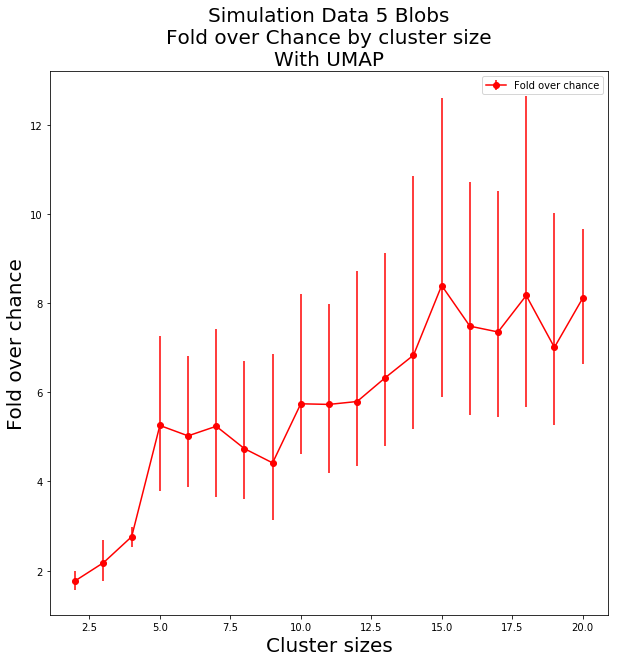

In [8]:
# sim5

fname = '/Users/ahyeon/Desktop/activ misc/sim5_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
print(predictions.shape, cluster_sizes.shape)
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc
print(fold_over_chance.shape)

plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Simulation Data 5 Blobs\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim5_foc.pdf')

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


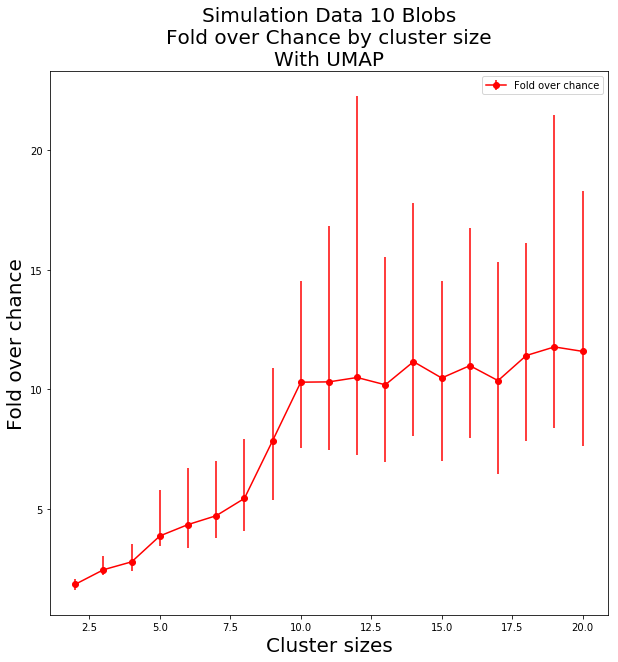

In [9]:
# sim10

fname = '/Users/ahyeon/Desktop/activ misc/sim10_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Simulation Data 10 Blobs\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim10_foc.pdf')

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


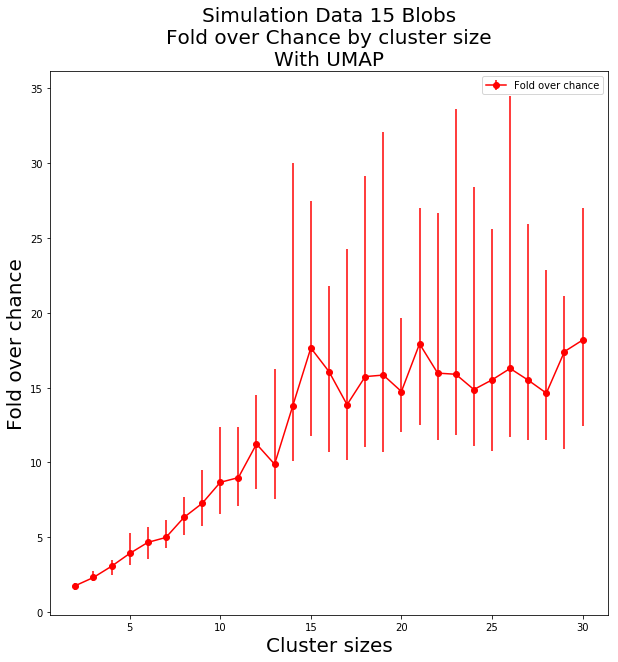

In [10]:
# sim15

fname = '/Users/ahyeon/Desktop/activ misc/sim15_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Simulation Data 15 Blobs\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim15_foc.pdf')

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


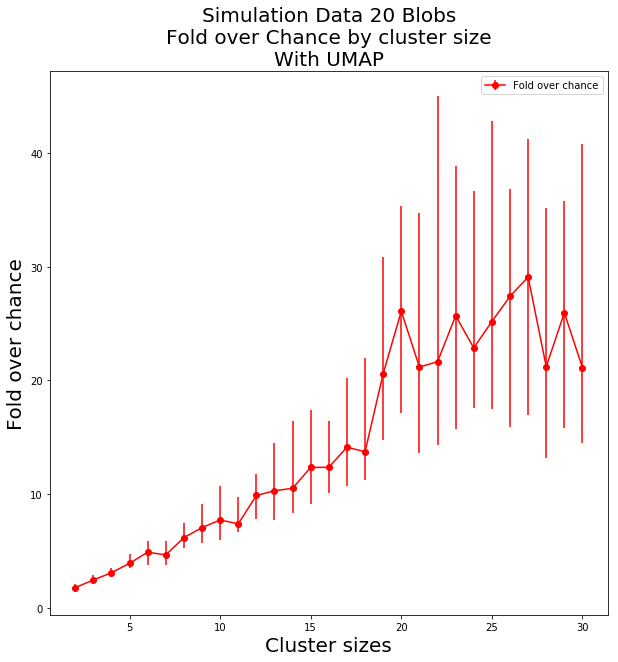

In [11]:
# sim20

fname = '/Users/ahyeon/Desktop/activ misc/sim20_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Simulation Data 20 Blobs\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim20_foc.pdf')

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


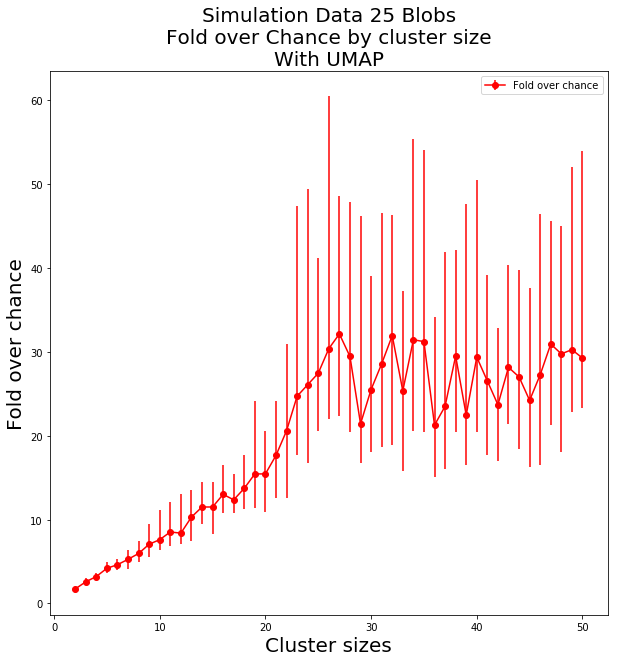

In [12]:
# sim25

fname = '/Users/ahyeon/Desktop/activ misc/sim25_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Simulation Data 25 Blobs\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim25_foc.pdf')

/Users/ahyeon/anaconda3/envs/activ/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


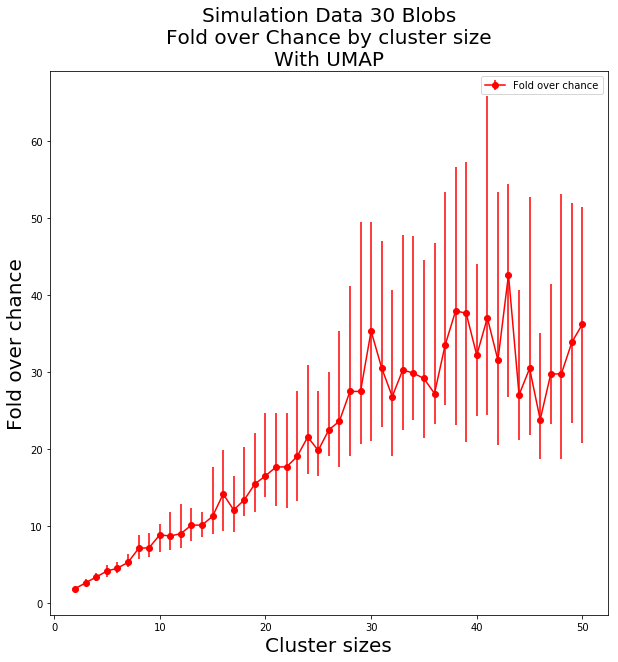

In [14]:
# sim30

fname = '/Users/ahyeon/Desktop/activ misc/sim30_results.h5'
f = h5py.File(fname, 'r')
acc = np.squeeze(f['score'][:], axis=1)
predictions = np.squeeze(f['score'][:], axis=1)
norm_predictions = np.squeeze(f['norm_score'][:], axis=1)
cluster_sizes = f['cluster_sizes'][:]
labels = np.squeeze(f['clusters'][:], axis=1)
fold_over_chance = np.zeros((len(cluster_sizes), 50))
raw_acc = np.zeros((len(cluster_sizes), 50))
normalized_acc = np.zeros((len(cluster_sizes), 50))
for jj,c in enumerate(cluster_sizes):
    all50mat = conf_alliter(c, predictions, labels)
    norm_all50mat = conf_alliter(c, norm_predictions, labels)
    acc = [accuracy(i) for i in all50mat]
    norm_acc = [accuracy(i) for i in norm_all50mat]
    foc = [float(x/y) for x, y in zip(acc, norm_acc)]
    fold_over_chance[jj,:] = foc
    raw_acc[jj,:] = acc
    normalized_acc[jj,:] = norm_acc


plt.rcParams["figure.figsize"] = [10,10]
cmap = plt.get_cmap("tab10")
lower = np.asarray([np.percentile(fold_over_chance[i,:], 25) for i in range(len(cluster_sizes))])
upper = np.asarray([np.percentile(fold_over_chance[i,:], 75) for i in range(len(cluster_sizes))])
med = np.median(fold_over_chance, axis=1)
raw_med = np.median(raw_acc, axis=1)
raw_lower = [np.percentile(raw_acc[i,:], 25) for i in range(len(cluster_sizes))]
raw_upper = [np.percentile(raw_acc[i,:], 75) for i in range(len(cluster_sizes))]
norm_med = np.median(normalized_acc, axis=1)
norm_lower = [np.percentile(normalized_acc[i,:], 25) for i in range(len(cluster_sizes))]
norm_upper = [np.percentile(normalized_acc[i,:], 75) for i in range(len(cluster_sizes))]
yerr = upper-lower

plt.errorbar(cluster_sizes, med, yerr=[med-lower,upper-med], color = 'red',fmt='-o', label='Fold over chance')

plt.title("Simulation Data 30 Blobs\nFold over Chance by cluster size\nWith UMAP", fontsize=20)
plt.xlabel("Cluster sizes", fontsize=20)
plt.ylabel("Fold over chance", fontsize=20)
plt.legend()

plt.savefig('/Users/ahyeon/Desktop/activ misc/sim30_foc.pdf')